In [ ]:
%reset -f

In [2]:
import glob
import uproot
from dataclasses import dataclass

import numpy as np
import pandas as pd

from multiprocessing import Pool
from numba import njit

import matplotlib.pyplot as plt

In [3]:
nTuple_dir_list = glob.glob('/root/data/qe-stkorn-v2/*/*.root')

# debug
with uproot.open(nTuple_dir_list[0], mode="r") as file:
    print(file['reco;1'].keys(), end='\n\n')
    print(file['truth;1'].keys())

['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'weight_beamspot', 'eventNumber', 'mcChannelNumber', 'runNumber', 'trigPassed_HLT_e120_lhloose', 'trigPassed_HLT_e140_lhloose_nod0', 'trigPassed_HLT_e17_lhloose_mu14', 'trigPassed_HLT_e17_lhloose_nod0_mu14', 'trigPassed_HLT_e24_lhmedium_L1EM20VH', 'trigPassed_HLT_e26_lhtight_nod0_ivarloose', 'trigPassed_HLT_e60_lhmedium', 'trigPassed_HLT_e60_lhmedium_nod0', 'trigPassed_HLT_mu20_iloose_L1MU15', 'trigPassed_HLT_mu26_ivarmedium', 'trigPassed_HLT_mu40', 'trigPassed_HLT_mu50', 'el_IFFClass', 'el_charge', 'el_eta', 'el_phi', 'jet_eta', 'jet_GN2v01_Continuous_quantile', 'jet_GN2v01_FixedCutBEff_90_select', 'jet_phi', 'mu_IFFClass', 'mu_charge', 'mu_eta', 'mu_phi', 'weight_pileup_NOSYS', 'weight_ftag_effSF_GN2v01_Continuous_NOSYS', 'weight_mc_NOSYS', 'globalTriggerMatchLooseBLayerLHMediumDNN_Loose_VarRad_Loose_Loose_VarRad_NOSYS', 'globalTriggerMatchLooseBLayerLHMediumDNN_Loose_VarRad_Loose_NonIso_NOSYS', 'globalTriggerMatchLo

In [ ]:
def extract_variable(data, branch_name):
    return data[branch_name]

def process_ntuple_files(nTuple_dir_list, branches, data_mode='truth'):
    accumulated_results = {branch: [] for branch in branches}

    for nTuple_file in nTuple_dir_list:
        with uproot.open(nTuple_file, mode="r") as file:
            data = file[data_mode+';1'].arrays(branches, library='np')
        
        print(f'Processing {nTuple_file} ...') # debug info 
        with Pool() as pool:
            results = pool.starmap(extract_variable, [(data, branch) for branch in branches])
        print(f'Finished processing {nTuple_file}!') # debug info
        
        for branch, result in zip(branches, results):
            accumulated_results[branch].append(result)
    
    for branch in branches:
        accumulated_results[branch] = np.concatenate(accumulated_results[branch])
    
    return accumulated_results

In [5]:
# Truth branches (mixing polarizing)

branches = [
    'HWW_MC_Hdecay1_decay1_afterFSR_pt',
    'HWW_MC_Hdecay1_decay1_afterFSR_eta',
    'HWW_MC_Hdecay1_decay1_afterFSR_phi',
    'HWW_MC_Hdecay1_decay1_afterFSR_pdgId',
    'HWW_MC_Hdecay1_decay2_afterFSR_pt',
    'HWW_MC_Hdecay1_decay2_afterFSR_eta',
    'HWW_MC_Hdecay1_decay2_afterFSR_phi',
    'HWW_MC_Hdecay1_decay2_afterFSR_pdgId',
    'HWW_MC_Hdecay2_decay1_afterFSR_pt',
    'HWW_MC_Hdecay2_decay1_afterFSR_eta',
    'HWW_MC_Hdecay2_decay1_afterFSR_phi',
    'HWW_MC_Hdecay2_decay1_afterFSR_pdgId',
    'HWW_MC_Hdecay2_decay2_afterFSR_pt',
    'HWW_MC_Hdecay2_decay2_afterFSR_eta',
    'HWW_MC_Hdecay2_decay2_afterFSR_phi',
    'HWW_MC_Hdecay2_decay2_afterFSR_pdgId',
    'HWW_MC_Hdecay1_afterFSR_pt',
    'HWW_MC_Hdecay1_afterFSR_eta',
    'HWW_MC_Hdecay1_afterFSR_phi',
    'HWW_MC_Hdecay1_afterFSR_m',
    'HWW_MC_Hdecay1_afterFSR_pdgId',
    'HWW_MC_Hdecay2_afterFSR_pt',
    'HWW_MC_Hdecay2_afterFSR_eta',
    'HWW_MC_Hdecay2_afterFSR_phi',
    'HWW_MC_Hdecay2_afterFSR_m',
    'HWW_MC_Hdecay2_afterFSR_pdgId',
    'HWW_MC_H_afterFSR_pt',
    'HWW_MC_H_afterFSR_eta',
    'HWW_MC_H_afterFSR_phi',
    'HWW_MC_H_afterFSR_m',
    'HWW_MC_H_afterFSR_pdgId'
]

truth_mixing_data = process_ntuple_files(nTuple_dir_list, branches)

# Extract variables from accumulated results
(
    truth_lnu11_pt, truth_lnu11_eta, truth_lnu11_phi, truth_lnu11_id,
    truth_lnu12_pt, truth_lnu12_eta, truth_lnu12_phi, truth_lnu12_id,
    truth_lnu21_pt, truth_lnu21_eta, truth_lnu21_phi, truth_lnu21_id,
    truth_lnu22_pt, truth_lnu22_eta, truth_lnu22_phi, truth_lnu22_id,
    truth_w1_pt, truth_w1_eta, truth_w1_phi, truth_w1_m, truth_w1_id,
    truth_w2_pt, truth_w2_eta, truth_w2_phi, truth_w2_m, truth_w2_id,
    truth_higgs_pt, truth_higgs_eta, truth_higgs_phi, truth_higgs_m, truth_higgs_id
) = [truth_mixing_data[branch] for branch in branches]

Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root!
Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13167_p6490.121124-v2_output/user.stkorn.42052934._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13167_p6490.121124-v2_output/user.stkorn.42052934._000001.output.root!
Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13144_p6490.121124-v2_output/user.stkorn.42053499._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13144_p6490.121124-v2_outpu

In [6]:
# truth branches (only longitudinal polarzing) --> leptons are  modified by CAR alg

branches = [
    'MC_Hdecay1_decay1_afterFSR_CAR_pt',
    'MC_Hdecay1_decay1_afterFSR_CAR_eta',
    'MC_Hdecay1_decay1_afterFSR_CAR_phi',
    'MC_Hdecay1_decay1_afterFSR_CAR_pdgId',
    'MC_Hdecay1_decay2_afterFSR_CAR_pt',
    'MC_Hdecay1_decay2_afterFSR_CAR_eta',
    'MC_Hdecay1_decay2_afterFSR_CAR_phi',
    'MC_Hdecay1_decay2_afterFSR_CAR_pdgId',
    'MC_Hdecay2_decay1_afterFSR_CAR_pt',
    'MC_Hdecay2_decay1_afterFSR_CAR_eta',
    'MC_Hdecay2_decay1_afterFSR_CAR_phi',
    'MC_Hdecay2_decay1_afterFSR_CAR_pdgId',
    'MC_Hdecay2_decay2_afterFSR_CAR_pt',
    'MC_Hdecay2_decay2_afterFSR_CAR_eta',
    'MC_Hdecay2_decay2_afterFSR_CAR_phi',
    'MC_Hdecay2_decay2_afterFSR_CAR_pdgId',
]

truth_only_data = process_ntuple_files(nTuple_dir_list, branches)

(
    truth_lnu11_car_pt, truth_lnu11_car_eta, truth_lnu11_car_phi, truth_lnu11_car_id,
    truth_lnu12_car_pt, truth_lnu12_car_eta, truth_lnu12_car_phi, truth_lnu12_car_id,
    truth_lnu21_car_pt, truth_lnu21_car_eta, truth_lnu21_car_phi, truth_lnu21_car_id,
    truth_lnu22_car_pt, truth_lnu22_car_eta, truth_lnu22_car_phi, truth_lnu22_car_id,
) = [truth_only_data[branch] for branch in branches]

Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root!
Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13167_p6490.121124-v2_output/user.stkorn.42052934._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13167_p6490.121124-v2_output/user.stkorn.42052934._000001.output.root!
Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13144_p6490.121124-v2_output/user.stkorn.42053499._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13144_p6490.121124-v2_outpu

In [7]:
# reco branches (mixing polarzing)

branches = [
    'met_met_NOSYS',
    'met_phi_NOSYS',
    'el_pt_NOSYS',
    'el_eta',
    'el_phi',
    'mu_pt_NOSYS',
    'mu_eta',
    'mu_phi'
]

reco_data = process_ntuple_files(nTuple_dir_list, branches, data_mode='reco')

(
    met_pt, met_phi, 
    el_pt, el_eta, el_phi,
    mu_pt, mu_eta, mu_phi
) = [reco_data[branch] for branch in branches]

Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13145_p6490.121124-v2_output/user.stkorn.42053512._000001.output.root!
Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13167_p6490.121124-v2_output/user.stkorn.42052934._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13167_p6490.121124-v2_output/user.stkorn.42052934._000001.output.root!
Processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13144_p6490.121124-v2_output/user.stkorn.42053499._000001.output.root ...
Finished processing /root/data/qe-stkorn-v2/user.stkorn.345324.PowhegPythia8EvtGen.DAOD_PHYS.e5769_s3681_r13144_p6490.121124-v2_outpu

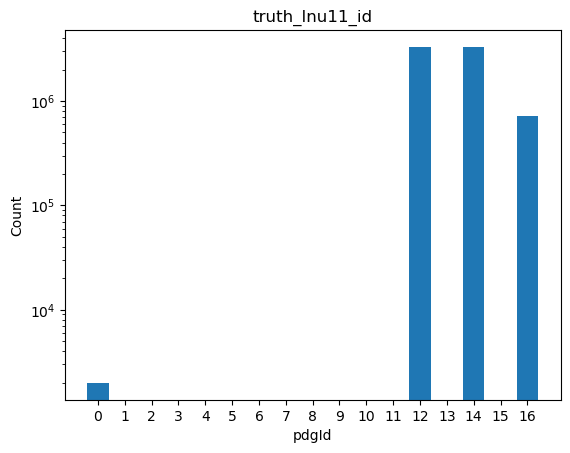

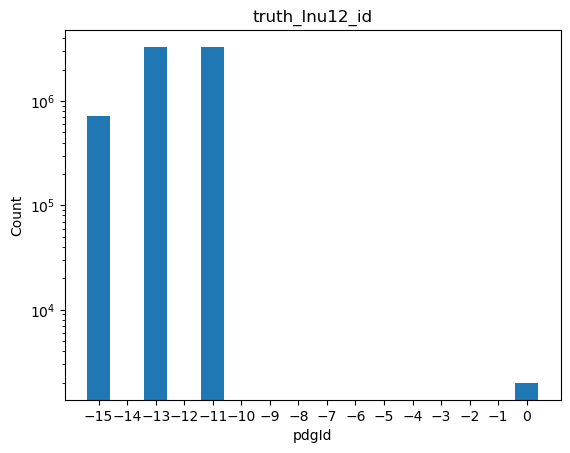

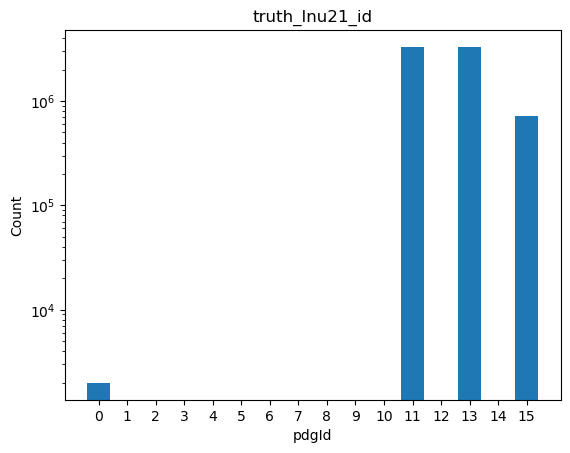

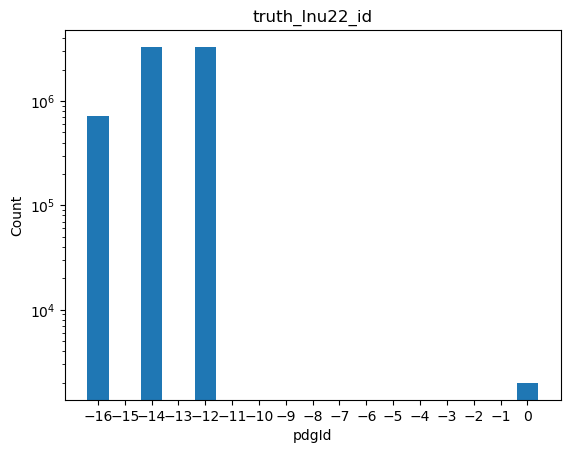

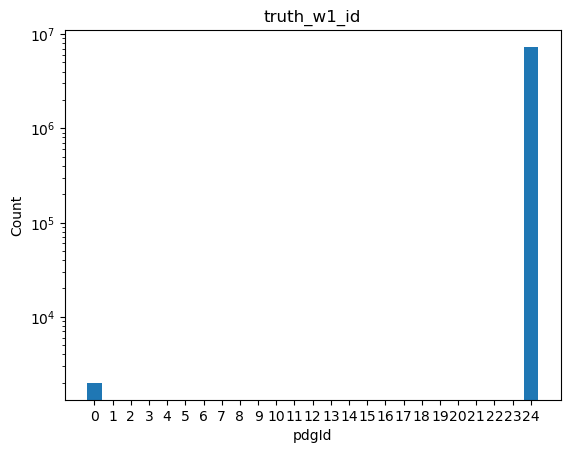

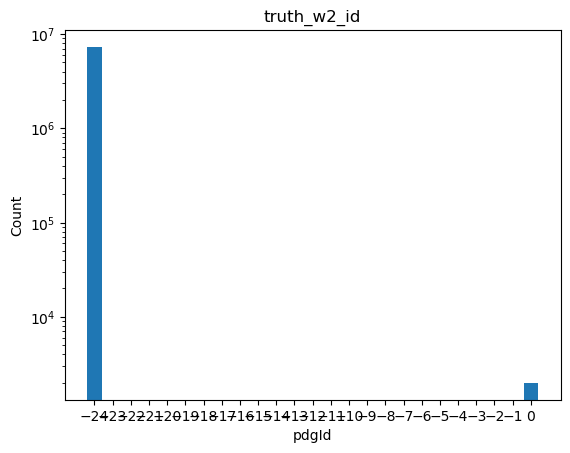

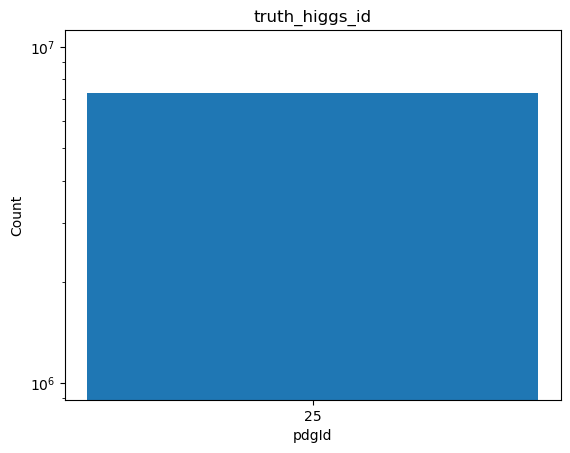

In [30]:
unique_ids, counts = np.unique(truth_lnu11_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdgId')
plt.ylabel('Count')
plt.title('truth_lnu11_id')
plt.show()

unique_ids, counts = np.unique(truth_lnu12_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdgId')
plt.ylabel('Count')
plt.title('truth_lnu12_id')
plt.show()

unique_ids, counts = np.unique(truth_lnu21_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdgId')
plt.ylabel('Count')
plt.title('truth_lnu21_id')
plt.show()

unique_ids, counts = np.unique(truth_lnu22_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdgId')
plt.ylabel('Count')
plt.title('truth_lnu22_id')
plt.show()

unique_ids, counts = np.unique(truth_w1_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdgId')
plt.ylabel('Count')
plt.title('truth_w1_id')
plt.show()

unique_ids, counts = np.unique(truth_w2_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdgId')
plt.ylabel('Count')
plt.title('truth_w2_id')
plt.show()

unique_ids, counts = np.unique(truth_higgs_id, return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdgId')
plt.ylabel('Count')
plt.title('truth_higgs_id')
plt.show()

In [ ]:
def is_valid(part1, part2, part11, part12, part21, part22):
    '''
    :params part1:  pdgId of the Hdecay1 --> W+
    :params part2:  pdgId of the Hdecay2 --> W-
    :params part11: pdgId of the particle 1 from Hdecay1 --> neutrino
    :params part12: pdgId of the particle 2 from Hdecay1 --> lepton
    :params part21: pdgId of the particle 1 from Hdecay2 --> lepton
    :params part22: pdgId of the particle 2 from Hdecay2 --> neutrino
    
    :return: boolean array of valid H->WW*->lvlv events
    '''
    cond1 = (part11 * part12 == -11*12) | (part11 * part12 == -13*14)  # pairing correct l and nu for part1
    cond2 = (part21 * part22 == -11*12) | (part21 * part22 == -13*14)  # pairing correct l and nu for part2
    cond3 = part12 * part21 == -11*13  # pairing diff flav leps and conserving charge (e, mu only)
    cond4 = part1 == 24   # confirm W+ boson (excluding zero paddings)
    cond5 = part2 == -24  # confirm W- boson (excluding zero paddings)
    # higgs has already been checked to be the correct particle ID form previous plots
    return cond1 & cond2 & cond3 & cond4 & cond5

valid_ind = is_valid(truth_w1_id, truth_w2_id, truth_lnu11_id, truth_lnu12_id, truth_lnu21_id, truth_lnu22_id)
valid_car_ind = is_valid(truth_w1_id, truth_w2_id, truth_lnu11_car_id, truth_lnu12_car_id, truth_lnu21_car_id, truth_lnu22_car_id)
print("Check CAR results:", np.all(valid_ind == valid_car_ind))

Check CAR results: True


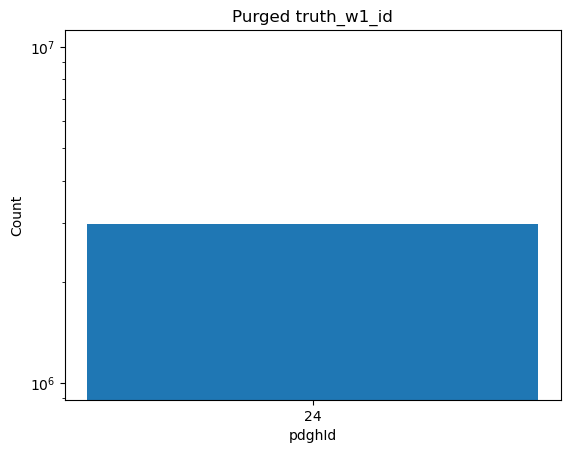

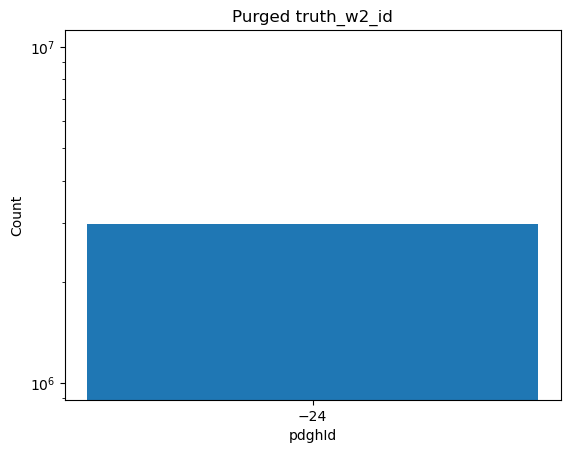

Two w boson need to have same length... True


In [36]:
unique_ids, counts = np.unique(truth_w1_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdghId')
plt.ylabel('Count')
plt.title('Purged truth_w1_id')
plt.show()

unique_ids, counts = np.unique(truth_w2_id[valid_ind], return_counts=True)
plt.bar(unique_ids, counts)
plt.semilogy()
plt.xticks(np.arange(unique_ids.min(), unique_ids.max()+1, 1))
plt.xlabel('pdghId')
plt.ylabel('Count')
plt.title('Purged truth_w2_id')
plt.show()

print("Two w boson need to have same length...", np.all(len(truth_w1_id[valid_ind] == len(truth_w2_id[valid_ind]))))

In [ ]:
def test_plot(data, title, xlabel="[MeV]", ylabel="Count"):
    plt.figure(figsize=(12, 6))
    plt.hist(data, bins=np.linspace(data.min(), data.max(), 101))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    plt.close()

In [12]:
@njit(fastmath=True)
def px(pt, phi):
	return pt * np.cos(phi)

@njit(fastmath=True)
def py(pt, phi):
	return pt * np.sin(phi)

@njit(fastmath=True)
def pz(pt, eta):
	return pt * np.sinh(eta)

@njit(fastmath=True)
def energy(pt, eta, m):
	return np.sqrt(np.square(pt) + np.square(pz(pt, eta)) + np.square(m))

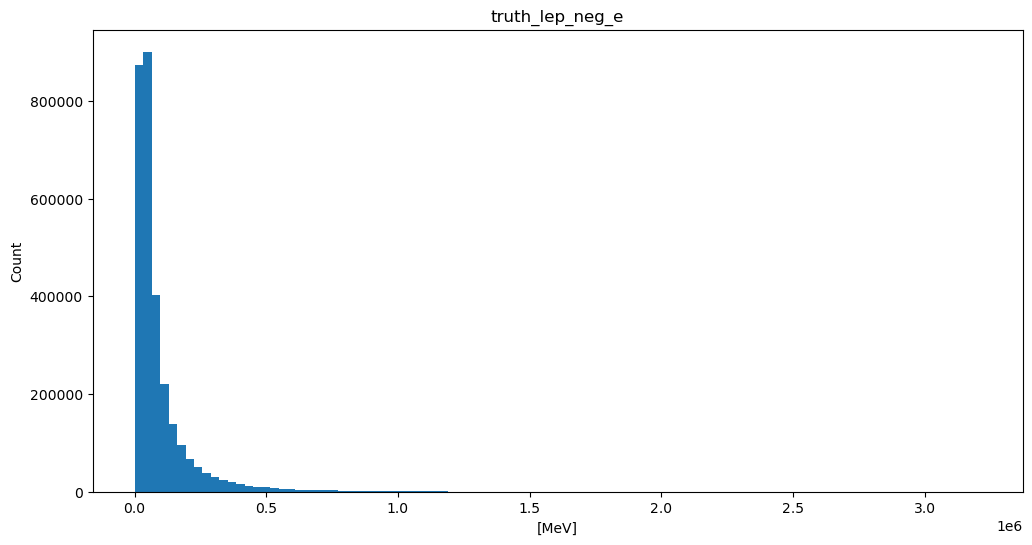

In [13]:
# truth lep

truth_nu_pos_pt  = truth_lnu11_pt[valid_ind]
truth_lep_neg_pt = truth_lnu12_pt[valid_ind]
truth_lep_pos_pt = truth_lnu21_pt[valid_ind]
truth_nu_neg_pt  = truth_lnu22_pt[valid_ind]
# test_plot(truth_nu_pos_pt, 'truth_nu_pos_pt')
# test_plot(truth_lep_neg_pt, 'truth_lep_neg_pt')

truth_nu_pos_eta  = truth_lnu11_eta[valid_ind]
truth_lep_neg_eta = truth_lnu12_eta[valid_ind]
truth_lep_pos_eta = truth_lnu21_eta[valid_ind]
truth_nu_neg_eta  = truth_lnu22_eta[valid_ind]

truth_nu_pos_phi  = truth_lnu11_phi[valid_ind]
truth_lep_neg_phi = truth_lnu12_phi[valid_ind]
truth_lep_pos_phi = truth_lnu21_phi[valid_ind]
truth_nu_neg_phi  = truth_lnu22_phi[valid_ind]

truth_nu_pos_m = np.zeros(truth_nu_pos_phi.shape)
lep_neg_m = np.full(len(truth_nu_pos_m), -999, dtype=np.float32)
mask_electron = truth_lnu12_id[valid_ind] == -11
mask_muon = truth_lnu12_id[valid_ind] == -13
lep_neg_m[mask_electron] = 0.000511
lep_neg_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_neg_id is not lepton")
lep_pos_m = np.full(len(truth_nu_pos_phi), -999, dtype=np.float32)
mask_electron = truth_lnu21_id[valid_ind] == 11
mask_muon = truth_lnu21_id[valid_ind] == 13
lep_pos_m[mask_electron] = 0.000511
lep_pos_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
	print("Error: lep_pos_id is not lepton")
truth_nu_neg_m = np.zeros(truth_nu_neg_phi.shape)

truth_nu_pos_px = px(truth_nu_pos_pt, truth_nu_pos_phi)
truth_nu_pos_py = py(truth_nu_pos_pt, truth_nu_pos_phi)
truth_nu_pos_pz = pz(truth_nu_pos_pt, truth_nu_pos_eta)
truth_nu_pos_e  = energy(truth_nu_pos_pt, truth_nu_pos_eta, truth_nu_pos_m)
truth_nu_neg_px = px(truth_nu_neg_pt, truth_nu_neg_phi)
truth_nu_neg_py = py(truth_nu_neg_pt, truth_nu_neg_phi)
truth_nu_neg_pz = pz(truth_nu_neg_pt, truth_nu_neg_eta)
truth_nu_neg_e  = energy(truth_nu_neg_pt, truth_nu_neg_eta, truth_nu_neg_m)
truth_lep_pos_px = px(truth_lep_pos_pt, truth_lep_pos_phi)
truth_lep_pos_py = py(truth_lep_pos_pt, truth_lep_pos_phi)
truth_lep_pos_pz = pz(truth_lep_pos_pt, truth_lep_pos_eta)
truth_lep_pos_e  = energy(truth_lep_pos_pt, truth_lep_pos_eta, lep_pos_m)
truth_lep_neg_px = px(truth_lep_neg_pt, truth_lep_neg_phi)
truth_lep_neg_py = py(truth_lep_neg_pt, truth_lep_neg_phi)
truth_lep_neg_pz = pz(truth_lep_neg_pt, truth_lep_neg_eta)
truth_lep_neg_e  = energy(truth_lep_neg_pt, truth_lep_neg_eta, lep_neg_m)
test_plot(truth_lep_neg_e, 'truth_lep_neg_e')

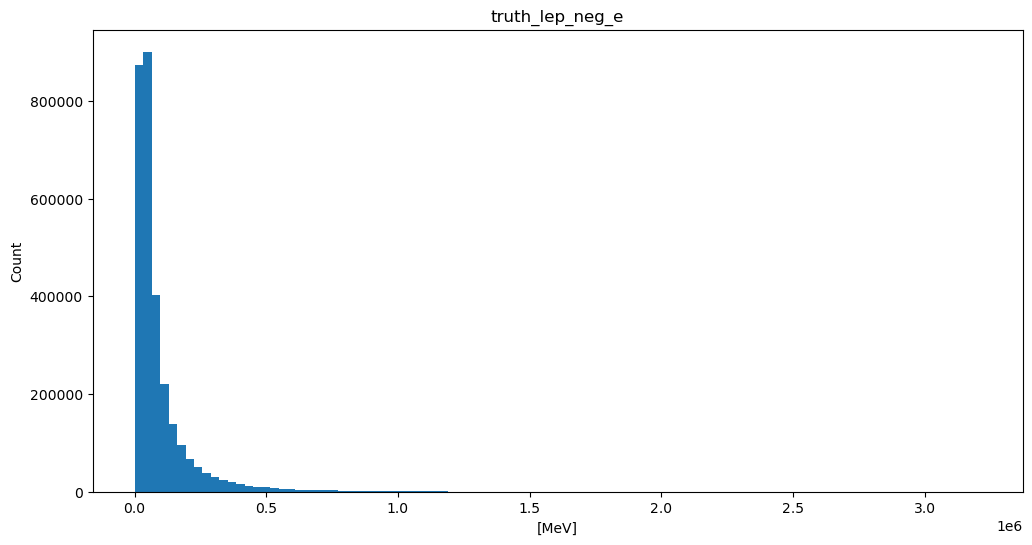

In [14]:
# truth lep (CAR)

truth_nu_pos_car_pt  = truth_lnu11_car_pt[valid_ind]
truth_lep_neg_car_pt = truth_lnu12_car_pt[valid_ind]
truth_lep_pos_car_pt = truth_lnu21_car_pt[valid_ind]
truth_nu_neg_car_pt  = truth_lnu22_car_pt[valid_ind]
# test_plot(truth_nu_pos_car_pt, 'truth_nu_pos_car_pt')
# test_plot(truth_lep_neg_car_pt, 'truth_lep_neg_car_pt')

truth_nu_pos_car_eta  = truth_lnu11_car_eta[valid_ind]
truth_lep_neg_car_eta = truth_lnu12_car_eta[valid_ind]
truth_lep_pos_car_eta = truth_lnu21_car_eta[valid_ind]
truth_nu_neg_car_eta  = truth_lnu22_car_eta[valid_ind]

truth_nu_pos_car_phi  = truth_lnu11_car_phi[valid_ind]
truth_lep_neg_car_phi = truth_lnu12_car_phi[valid_ind]
truth_lep_pos_car_phi = truth_lnu21_car_phi[valid_ind]
truth_nu_neg_car_phi  = truth_lnu22_car_phi[valid_ind]

truth_nu_pos_car_m = np.zeros(truth_nu_pos_car_phi.shape)
lep_neg_car_m = np.full(len(truth_nu_pos_car_phi), -999, dtype=np.float32)
mask_electron = truth_lnu12_id[valid_ind] == -11
mask_muon = truth_lnu12_id[valid_ind] == -13
lep_neg_car_m[mask_electron] = 0.000511
lep_neg_car_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
    print("Error: lep_neg_id is not lepton")
lep_pos_car_m = np.full(len(truth_nu_pos_car_phi), -999, dtype=np.float32)
mask_electron = truth_lnu21_id[valid_ind] == 11
mask_muon = truth_lnu21_id[valid_ind] == 13
lep_pos_car_m[mask_electron] = 0.000511
lep_pos_car_m[mask_muon] = 0.105658
if not np.all(mask_muon | mask_electron):
	print("Error: lep_pos_id is not lepton")
truth_nu_neg_car_m = np.zeros(truth_nu_neg_car_phi.shape)

truth_nu_pos_car_px = px(truth_nu_pos_car_pt, truth_nu_pos_car_phi)
truth_nu_pos_car_py = py(truth_nu_pos_car_pt, truth_nu_pos_car_phi)
truth_nu_pos_car_pz = pz(truth_nu_pos_car_pt, truth_nu_pos_car_eta)
truth_nu_pos_car_e  = energy(truth_nu_pos_car_pt, truth_nu_pos_car_eta, truth_nu_pos_car_m)
truth_nu_neg_car_px = px(truth_nu_neg_car_pt, truth_nu_neg_car_phi)
truth_nu_neg_car_py = py(truth_nu_neg_car_pt, truth_nu_neg_car_phi)
truth_nu_neg_car_pz = pz(truth_nu_neg_car_pt, truth_nu_neg_car_eta)
truth_nu_neg_car_e  = energy(truth_nu_neg_car_pt, truth_nu_neg_car_eta, truth_nu_neg_car_m)
truth_lep_pos_car_px = px(truth_lep_pos_car_pt, truth_lep_pos_car_phi)
truth_lep_pos_car_py = py(truth_lep_pos_car_pt, truth_lep_pos_car_phi)
truth_lep_pos_car_pz = pz(truth_lep_pos_car_pt, truth_lep_pos_car_eta)
truth_lep_pos_car_e  = energy(truth_lep_pos_car_pt, truth_lep_pos_car_eta, lep_pos_car_m)
truth_lep_neg_car_px = px(truth_lep_neg_car_pt, truth_lep_neg_car_phi)
truth_lep_neg_car_py = py(truth_lep_neg_car_pt, truth_lep_neg_car_phi)
truth_lep_neg_car_pz = pz(truth_lep_neg_car_pt, truth_lep_neg_car_eta)
truth_lep_neg_car_e  = energy(truth_lep_neg_car_pt, truth_lep_neg_car_eta, lep_neg_car_m)
test_plot(truth_lep_neg_e, 'truth_lep_neg_e')


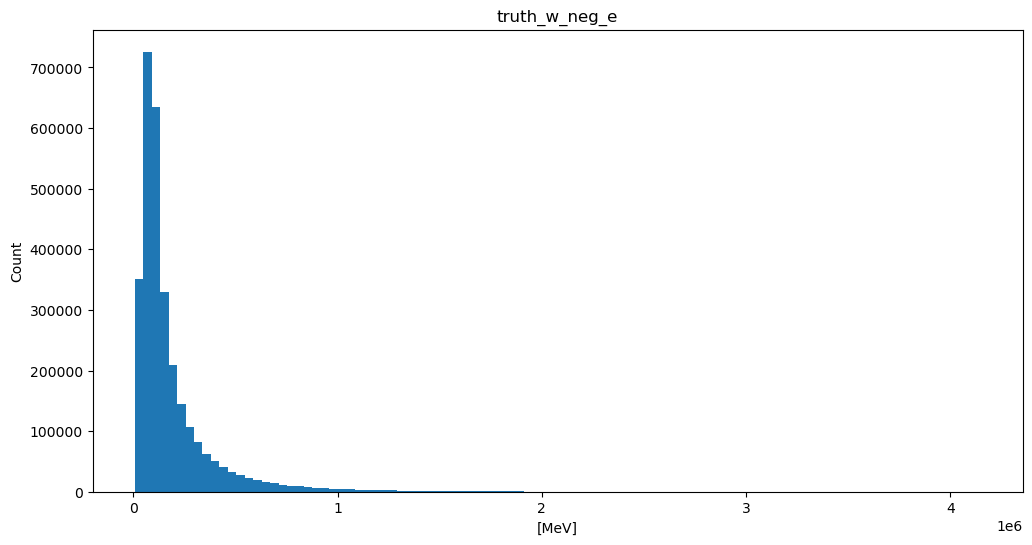

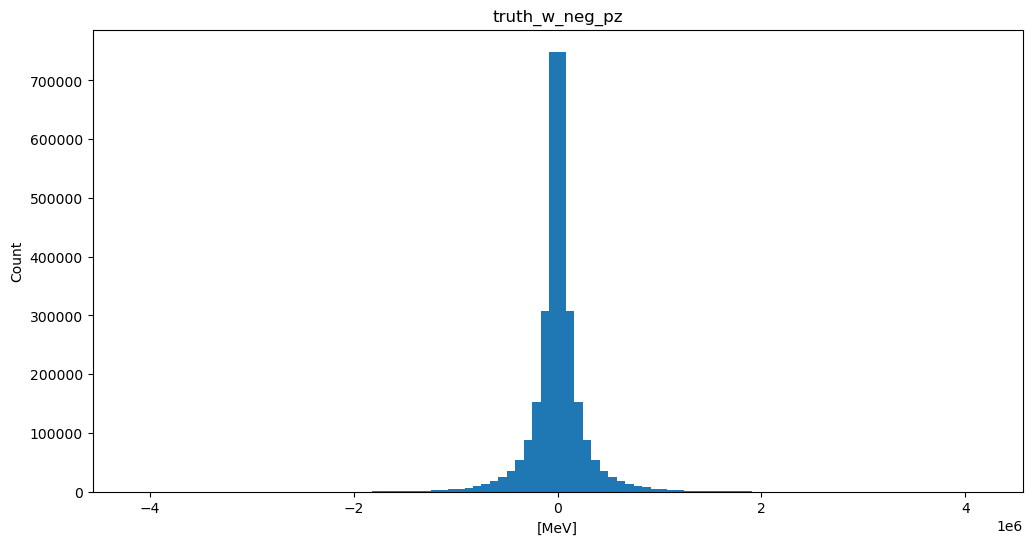

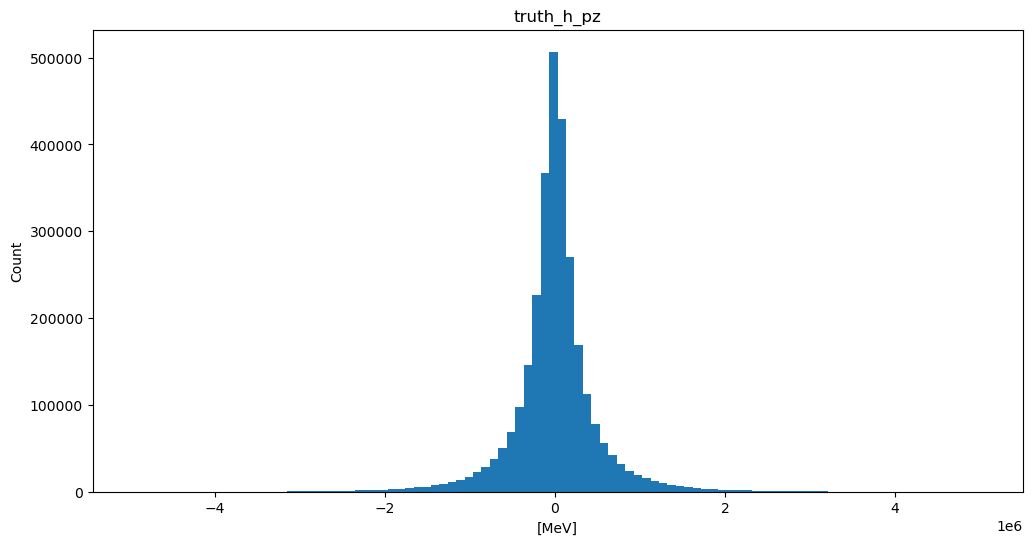

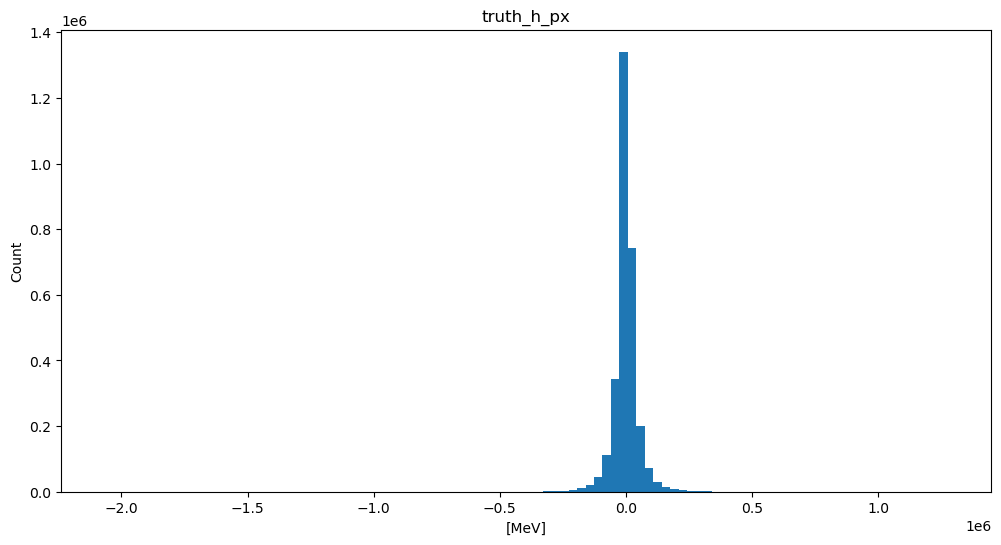

In [15]:
# truth w

truth_w_pos     = truth_w1_id[valid_ind]
truth_w_pos_pt  = truth_w1_pt[valid_ind]
truth_w_pos_eta = truth_w1_eta[valid_ind]
truth_w_pos_phi = truth_w1_phi[valid_ind]
truth_w_pos_m   = truth_w1_m[valid_ind]
# test_plot(truth_w_pos_m, 'truth_w_pos_m')

truth_w_neg     = truth_w2_id[valid_ind]
truth_w_neg_pt  = truth_w2_pt[valid_ind]
truth_w_neg_eta = truth_w2_eta[valid_ind]
truth_w_neg_phi = truth_w2_phi[valid_ind]
truth_w_neg_m   = truth_w2_m[valid_ind]
# test_plot(truth_w_neg_m, 'truth_w_neg_m')

truth_w_pos_px = px(truth_w_pos_pt, truth_w_pos_phi)
truth_w_pos_py = py(truth_w_pos_pt, truth_w_pos_phi)
truth_w_pos_pz = pz(truth_w_pos_pt, truth_w_pos_eta)
truth_w_pos_e  = energy(truth_w_pos_pt, truth_w_pos_eta, truth_w_pos_m)
truth_w_neg_px = px(truth_w_neg_pt, truth_w_neg_phi)
truth_w_neg_py = py(truth_w_neg_pt, truth_w_neg_phi)
truth_w_neg_pz = pz(truth_w_neg_pt, truth_w_neg_eta)
truth_w_neg_e  = energy(truth_w_neg_pt, truth_w_neg_eta, truth_w_neg_m)
test_plot(truth_w_neg_e, 'truth_w_neg_e')
test_plot(truth_w_neg_pz, 'truth_w_neg_pz')

# truth h
truth_h_pt  = truth_higgs_pt[valid_ind]
truth_h_eta = truth_higgs_eta[valid_ind]
truth_h_phi = truth_higgs_phi[valid_ind]
truth_h_m   = truth_higgs_m[valid_ind]
# test_plot(truth_h_m, 'truth_h_m')

truth_h_px = px(truth_h_pt, truth_h_phi)
truth_h_py = py(truth_h_pt, truth_h_phi)
truth_h_pz = pz(truth_h_pt, truth_h_eta)
truth_h_e  = energy(truth_h_pt, truth_h_eta, truth_h_m)
test_plot(truth_h_pz, 'truth_h_pz')
test_plot(truth_h_px, 'truth_h_px')

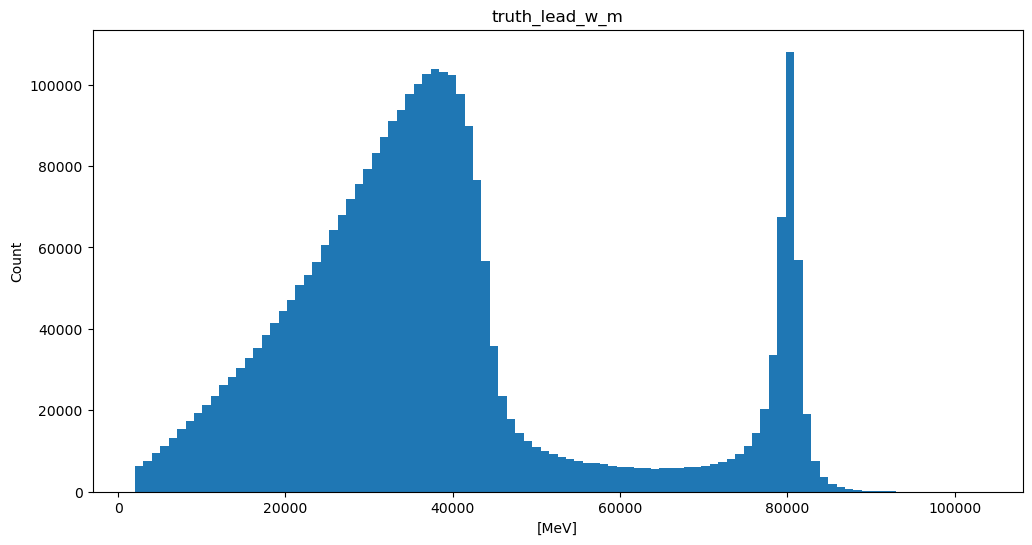

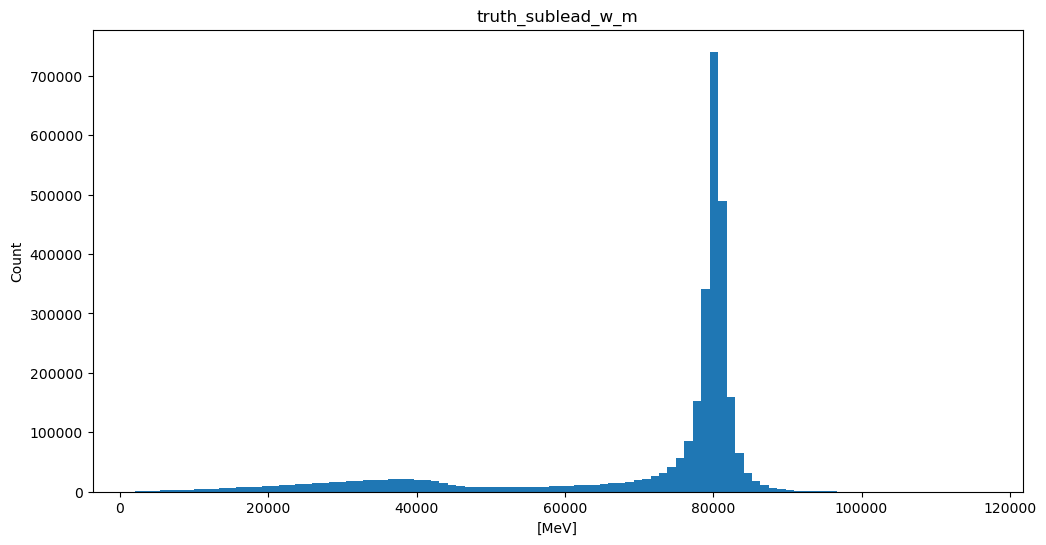

In [16]:
# (sub)lead identification (truth) 

neg_leading_mask = truth_lep_neg_pt >= truth_lep_pos_pt

truth_lead_lep_px = np.where(neg_leading_mask, truth_lep_neg_px, truth_lep_pos_px)
truth_lead_lep_py = np.where(neg_leading_mask, truth_lep_neg_py, truth_lep_pos_py)
truth_lead_lep_pz = np.where(neg_leading_mask, truth_lep_neg_pz, truth_lep_pos_pz)
truth_lead_lep_e  = np.where(neg_leading_mask, truth_lep_neg_e, truth_lep_pos_e)

truth_sublead_lep_px = np.where(neg_leading_mask, truth_lep_pos_px, truth_lep_neg_px)
truth_sublead_lep_py = np.where(neg_leading_mask, truth_lep_pos_py, truth_lep_neg_py)
truth_sublead_lep_pz = np.where(neg_leading_mask, truth_lep_pos_pz, truth_lep_neg_pz)
truth_sublead_lep_e  = np.where(neg_leading_mask, truth_lep_pos_e, truth_lep_neg_e)

truth_lead_nu_px = np.where(neg_leading_mask, truth_nu_neg_px, truth_nu_pos_px)
truth_lead_nu_py = np.where(neg_leading_mask, truth_nu_neg_py, truth_nu_pos_py)
truth_lead_nu_pz = np.where(neg_leading_mask, truth_nu_neg_pz, truth_nu_pos_pz)
truth_lead_nu_e  = np.where(neg_leading_mask, truth_nu_neg_e, truth_nu_pos_e)

truth_sublead_nu_px = np.where(neg_leading_mask, truth_nu_pos_px, truth_nu_neg_px)
truth_sublead_nu_py = np.where(neg_leading_mask, truth_nu_pos_py, truth_nu_neg_py)
truth_sublead_nu_pz = np.where(neg_leading_mask, truth_nu_pos_pz, truth_nu_neg_pz)
truth_sublead_nu_e  = np.where(neg_leading_mask, truth_nu_pos_e, truth_nu_neg_e)

truth_lead_w_px = np.where(neg_leading_mask, truth_w_neg_px, truth_w_pos_px)
truth_lead_w_py = np.where(neg_leading_mask, truth_w_neg_py, truth_w_pos_py)
truth_lead_w_pz = np.where(neg_leading_mask, truth_w_neg_pz, truth_w_pos_pz)
truth_lead_w_e  = np.where(neg_leading_mask, truth_w_neg_e, truth_w_pos_e)
truth_lead_w_m  = np.where(neg_leading_mask, truth_w_neg_m, truth_w_pos_m)

truth_sublead_w_px = np.where(neg_leading_mask, truth_w_pos_px, truth_w_neg_px)
truth_sublead_w_py = np.where(neg_leading_mask, truth_w_pos_py, truth_w_neg_py)
truth_sublead_w_pz = np.where(neg_leading_mask, truth_w_pos_pz, truth_w_neg_pz)
truth_sublead_w_e  = np.where(neg_leading_mask, truth_w_pos_e, truth_w_neg_e)
truth_sublead_w_m  = np.where(neg_leading_mask, truth_w_pos_m, truth_w_neg_m)
test_plot(truth_lead_w_m, 'truth_lead_w_m')
test_plot(truth_sublead_w_m, 'truth_sublead_w_m')

In [17]:
# (sub)lead identification (truth_CAR) 

neg_leading_car_mask = truth_lep_neg_car_pt >= truth_lep_pos_car_pt

truth_lead_lep_car_px = np.where(neg_leading_car_mask, truth_lep_neg_car_px, truth_lep_pos_car_px)
truth_lead_lep_car_py = np.where(neg_leading_car_mask, truth_lep_neg_car_py, truth_lep_pos_car_py)
truth_lead_lep_car_pz = np.where(neg_leading_car_mask, truth_lep_neg_car_pz, truth_lep_pos_car_pz)
truth_lead_lep_car_e  = np.where(neg_leading_car_mask, truth_lep_neg_car_e, truth_lep_pos_car_e)

truth_sublead_lep_car_px = np.where(neg_leading_car_mask, truth_lep_pos_car_px, truth_lep_neg_car_px)
truth_sublead_lep_car_py = np.where(neg_leading_car_mask, truth_lep_pos_car_py, truth_lep_neg_car_py)
truth_sublead_lep_car_pz = np.where(neg_leading_car_mask, truth_lep_pos_car_pz, truth_lep_neg_car_pz)
truth_sublead_lep_car_e  = np.where(neg_leading_car_mask, truth_lep_pos_car_e, truth_lep_neg_car_e)

truth_lead_nu_car_px = np.where(neg_leading_car_mask, truth_nu_neg_car_px, truth_nu_pos_car_px)
truth_lead_nu_car_py = np.where(neg_leading_car_mask, truth_nu_neg_car_py, truth_nu_pos_car_py)
truth_lead_nu_car_pz = np.where(neg_leading_car_mask, truth_nu_neg_car_pz, truth_nu_pos_car_pz)
truth_lead_nu_car_e  = np.where(neg_leading_car_mask, truth_nu_neg_car_e, truth_nu_pos_car_e)

truth_sublead_nu_car_px = np.where(neg_leading_car_mask, truth_nu_pos_car_px, truth_nu_neg_car_px)
truth_sublead_nu_car_py = np.where(neg_leading_car_mask, truth_nu_pos_car_py, truth_nu_neg_car_py)
truth_sublead_nu_car_pz = np.where(neg_leading_car_mask, truth_nu_pos_car_pz, truth_nu_neg_car_pz)
truth_sublead_nu_car_e  = np.where(neg_leading_car_mask, truth_nu_pos_car_e, truth_nu_neg_car_e)

In [18]:
GEV = 1e-3

def pt(px, py):
    return np.sqrt(np.square(px) + np.square(py))


def eta(px, py, pz):
    pt = np.sqrt(np.square(px) + np.square(py))
    return np.arcsinh(np.divide(pz, pt))


def phi(px, py):
    return np.arctan2(py, px)


def m(p4):
    return np.sqrt(
        np.square(p4[:, 3])
        - np.square(p4[:, 0])
        - np.square(p4[:, 1])
        - np.square(p4[:, 2])
    )


@dataclass
class Truth_lead_lep:
    px = truth_lead_lep_px * GEV
    py = truth_lead_lep_py * GEV
    pz = truth_lead_lep_pz * GEV
    energy = truth_lead_lep_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_sublead_lep:
    px = truth_sublead_lep_px * GEV
    py = truth_sublead_lep_py * GEV
    pz = truth_sublead_lep_pz * GEV
    energy = truth_sublead_lep_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_lead_lep_CAR:
    px = truth_lep_pos_car_px * GEV
    py = truth_lep_pos_car_py * GEV
    pz = truth_lep_pos_car_pz * GEV
    energy = truth_lep_pos_car_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_sublead_lep_CAR:
    px = truth_sublead_lep_car_px * GEV
    py = truth_sublead_lep_car_py * GEV
    pz = truth_sublead_lep_car_pz * GEV
    energy = truth_sublead_lep_car_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Truth_dilep:
    lead = Truth_lead_lep()
    sublead = Truth_sublead_lep()
    p4 = Truth_lead_lep.p4 + Truth_sublead_lep.p4
    p3 = p4[:, :3]
    px = p4[:, 0]
    py = p4[:, 1]
    pz = p4[:, 2]
    energy = p4[:, 3]
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m = m(p4)


@dataclass
class Dilep_CAR:
    lead = Truth_lead_lep_CAR()
    sublead = Truth_sublead_lep_CAR()
    p4 = Truth_lead_lep.p4 + Truth_sublead_lep.p4
    p3 = p4[:, :3]
    px = p4[:, 0]
    py = p4[:, 1]
    pz = p4[:, 2]
    energy = p4[:, 3]
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m = m(p4)

@dataclass
class Truth_lead_nu:
    px = truth_lead_nu_px * GEV
    py = truth_lead_nu_py * GEV
    pz = truth_lead_nu_pz * GEV
    energy = truth_lead_nu_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    

@dataclass
class Truth_sublead_nu:
    px = truth_sublead_nu_px * GEV
    py = truth_sublead_nu_py * GEV
    pz = truth_sublead_nu_pz * GEV
    energy = truth_sublead_nu_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T
    
    
@dataclass
class Lead_w:
    px = truth_lead_w_px * GEV
    py = truth_lead_w_py * GEV
    pz = truth_lead_w_pz * GEV
    energy = truth_lead_w_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m = truth_lead_w_m * GEV
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


@dataclass
class Sublead_w:
    px = truth_sublead_w_px * GEV
    py = truth_sublead_w_py * GEV
    pz = truth_sublead_w_pz * GEV
    energy = truth_sublead_w_e * GEV
    pt = pt(px, py)
    eta = eta(px, py, pz)
    phi = phi(px, py)
    m = truth_sublead_w_m * GEV
    p4 = np.array([px, py, pz, energy]).T
    p3 = np.array([px, py, pz]).T


if __name__ == "__main__":
    print(Truth_lead_lep)
    print(Truth_sublead_lep)
    print(Truth_dilep)
    print(Truth_lead_nu)
    print(Truth_sublead_nu)
    print(Lead_w)
    print(Sublead_w)


/tmp/ipykernel_2061221/1025811155.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(


<class '__main__.Truth_lead_lep'>
<class '__main__.Truth_sublead_lep'>
<class '__main__.Truth_dilep'>
<class '__main__.Truth_lead_nu'>
<class '__main__.Truth_sublead_nu'>
<class '__main__.Lead_w'>
<class '__main__.Sublead_w'>


<class 'numpy.ndarray'>


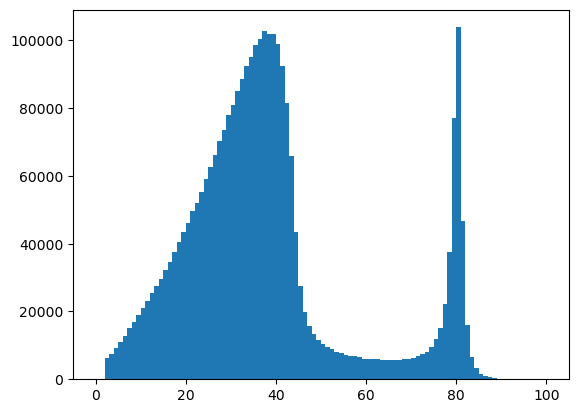

<class 'numpy.ndarray'>


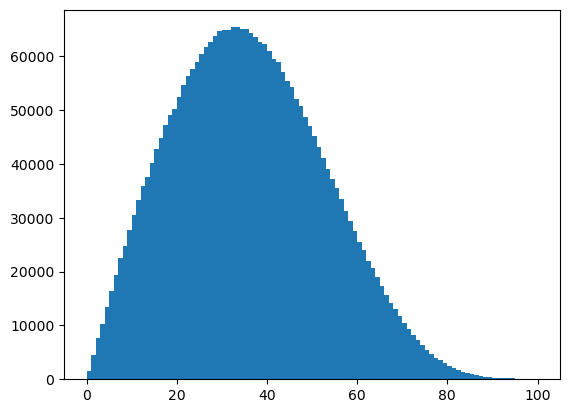

<class 'numpy.ndarray'>


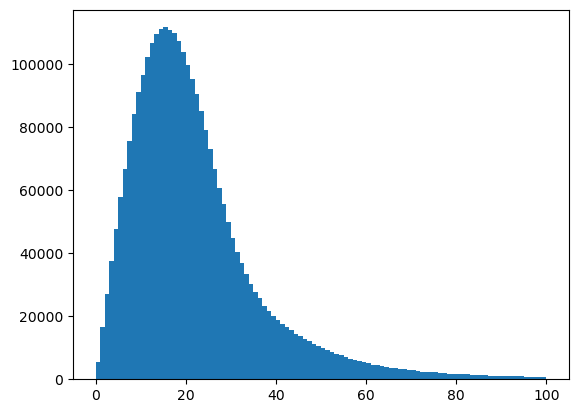

In [ ]:
# Double check the wrapped dataclass

test_truth_lead_w = Lead_w()
print(type(test_truth_lead_w.energy))
plt.hist(test_truth_lead_w.m, bins=np.linspace(0, 100, 101))
plt.show()
test_di_lep = Truth_dilep()
print(type(test_di_lep.py))
plt.hist(test_di_lep.m, bins=np.linspace(0, 100, 101))
plt.show()
test_nu = Truth_lead_nu()
print(type(test_nu.px))
plt.hist(test_nu.pt, bins=np.linspace(0, 100, 101))
plt.show()